In [1]:
from IPython.display import display, HTML

display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from helpers.readers import read_dataframe
from helpers.utils import cast_back_to_int64, downcast_int64


movie_column_names = [
    "Wikipedia movie ID", 
    "Freebase movie ID", 
    "Movie name", 
    "Movie release date", 
    "Movie box office revenue", 
    "Movie runtime", 
    "Movie languages", 
    "Movie countries", 
    "Movie genres",
]

test = pd.read_csv("data/CMU/movie.metadata.tsv", sep="\t", names=movie_column_names)
test.info()

# 1) CMU Movie Metadata

In [3]:
cmu_movies = read_dataframe(name='cmu/movies', preprocess=True, usecols=[
    "Wikipedia movie ID", 
    "Freebase movie ID", 
    "Movie name", 
    "Movie release date", 
    "Movie box office revenue", 
    "Movie runtime", 
    "Movie languages", 
    "Movie countries", 
    "Movie genres",
])
cmu_movies.shape

Preprocess logs:
✅ Fixed Movie Languages inside Movie Countries
✅ Removed Deseret characters
✅ Movie release date splitted to three columns: Movie release Year, Movie release Month, Movie release Day
✅ Fixed 'Hunting Season' release year 1010 => 2010
✅ Seperated freebase identifiers from Movie Languages, Movie Countries and Movie Genres
✅ Replaced Hariyani with Haryanvi
✅ Replaced Saami with Sami
✅ The Flying Scotsman (1929 film) country fix
✅ Ukranian SSR fix
✅ Palestinian territories fix
✅ Fixed huge runtimes
✅ Removed series


(81730, 11)

In [4]:
column_names = list(cmu_movies.columns)
unique_values = ['# unique values']
has_duplicates = ['# has duplicates']

for column in cmu_movies.columns:
    unique_values.append(cmu_movies[column].nunique())
    has_duplicates.append(cmu_movies[column].duplicated().any())

max_widths = [max(len(str(column_names[i])), len(str(unique_values[i+1])), len(str(has_duplicates[i+1]))) for i in range(len(column_names))]

formatted_column_names = ' | '.join([str(column_names[i]).ljust(max_widths[i]) for i in range(len(column_names))])
formatted_unique_values = ' | '.join([str(unique_values[i+1]).ljust(max_widths[i]) for i in range(len(column_names))])
formatted_has_duplicates = ' | '.join([str(has_duplicates[i+1]).ljust(max_widths[i]) for i in range(len(column_names))])

print(formatted_column_names)
print(formatted_unique_values)
print(formatted_has_duplicates)

Wikipedia movie ID | Freebase movie ID | Movie name | Movie box office revenue | Movie runtime | Movie release Year | Movie release Month | Movie release Day | Movie languages | Movie countries | Movie genres
81730              | 81730             | 75467      | 7362                     | 579           | 129                | 12                  | 31                | 1810            | 2120            | 23813       
False              | False             | True       | True                     | True          | True               | True                | True              | True            | True            | True        


### Languages

In [5]:
unique_languages = sorted(set([language.replace(" languages", "").replace(" language", "").strip() for sublist in cmu_movies["Movie languages"].str.split(',') for language in sublist if language.replace(" languages", "").replace(" language", "").strip()]))

for language in unique_languages:
    print(language)

Aboriginal Malay
Aceh
Adamawa
Afrikaans
Akan
Albanian
Algonquin
American English
American Sign
Amharic
Ancient
Ancient Greek
Apache
Arabic
Aramaic
Armenian
Assamese
Assyrian
Assyrian Neo-Aramaic
Australian Aboriginal Pidgin English
Australian English
Awadhi
Azerbaijani
Bambara
Banyumasan
Belarusian
Bengali
Bhojpuri
Bosnian
Brazilian Portuguese
Bulgarian
Burmese
Cantonese
Catalan
Cebuano
Central
Chadian Arabic
Chechen
Chewa
Cheyenne
Chhattisgarhi
Chinese
Classical Arabic
Corsican
Cree
Croatian
Crow
Czech
Danish
Dari
Deutsch
Dutch
Dzongkha
Egyptian
Egyptian Arabic
English
Esperanto
Estonian
Farsi
Filipino
Finnish
Flemish
France
French
French Sign
Frisian
Friulian
Fula
Fulfulde
Gaelic
Galician
Georgian
German
Greek
Guanzhong Hua
Gujarati
Gumatj
Hainanese
Hakka
Haryanvi
Hausa
Hawaiian
Hazaragi
Hebrew
Hiligaynon
Hindi
Hindustani
Hinglish
Hmong
Hokkien
Hopi
Hungarian
Hungary
Icelandic
Indian English
Indonesian
Inuktitut
Irish
Italian
Jamaican Creole English
Japan
Japanese
Jinyu
Judeo-Georgia

In [6]:
len(unique_languages)

207

Use languages carefully:
- Multiple "Enlish"
- Multiple "Arabic"
- "France", "French", "French Sign"

### Countries

In [7]:
all_countries = cmu_movies["Movie countries"]

split_countries = all_countries.str.split(',')

flat_list = [country.strip() for sublist in split_countries for country in sublist]

unique_countries = sorted(set(flat_list))

for country in unique_countries:
    print(country)


Afghanistan
Albania
Algeria
Argentina
Armenia
Aruba
Australia
Austria
Azerbaijan
Bahamas
Bahrain
Bangladesh
Belgium
Bhutan
Bolivia
Bosnia and Herzegovina
Brazil
Bulgaria
Burkina Faso
Burma
Cambodia
Cameroon
Canada
Chile
China
Colombia
Congo
Costa Rica
Croatia
Cuba
Cyprus
Czech Republic
Czechoslovakia
Democratic Republic of the Congo
Denmark
Egypt
England
Estonia
Ethiopia
Federal Republic of Yugoslavia
Finland
France
Georgia
Georgian SSR
German Democratic Republic
Germany
Greece
Guinea
Guinea-Bissau
Haiti
Hong Kong
Hungary
Iceland
India
Indonesia
Iran
Iraq
Iraqi Kurdistan
Ireland
Isle of Man
Israel
Italy
Jamaica
Japan
Jordan
Kenya
Kingdom of Great Britain
Kingdom of Italy
Korea
Kuwait
Lebanon
Libya
Lithuania
Luxembourg
Macau
Malaysia
Mali
Malta
Mandatory Palestine
Mexico
Monaco
Mongolia
Montenegro
Morocco
Nazi Germany
Nepal
Netherlands
New Zealand
Nigeria
Northern Ireland
Norway
Pakistan
Palestinian territories
Panama
Peru
Philippines
Poland
Portugal
Puerto Rico
Qatar
Republic of China

In [8]:
len(unique_countries)

143

Use countries carefully:
- Czechia Slovak multiple entries
- Multiple SSR
- Serbia & Montenegro, Yugoslavia
- Multiple Germany: Weimar, nazi, Democratic, Soviet occupation zone, ...
- Multiple Palestine
- Multiple Iraq
- Multiple China
- Kingdom of Italy, Kingdom of Great Britain

### Genres

In [9]:
all_genres = cmu_movies["Movie genres"]

split_genres = all_genres.str.split(',')

flat_list = [genre.strip() for sublist in split_genres for genre in sublist]

unique_genres = sorted(set(flat_list))

for genre in unique_genres:
    print(genre)


Absurdism
Acid western
Action
Action Comedy
Action Thrillers
Action/Adventure
Addiction Drama
Adult
Adventure
Adventure Comedy
Airplanes and airports
Albino bias
Alien Film
Alien invasion
Americana
Animal Picture
Animals
Animated Musical
Animated cartoon
Animation
Anime
Anthology
Anthropology
Anti-war
Anti-war film
Apocalyptic and post-apocalyptic fiction
Archaeology
Archives and records
Art film
Auto racing
Avant-garde
B-Western
B-movie
Backstage Musical
Baseball
Beach Film
Beach Party film
Bengali Cinema
Biker Film
Biographical film
Biography
Biopic [feature]
Black comedy
Black-and-white
Blaxploitation
Bloopers & Candid Camera
Bollywood
Boxing
Breakdance
British Empire Film
British New Wave
Bruceploitation
Buddy Picture
Buddy cop
Buddy film
Business
C-Movie
Camp
Caper story
Cavalry Film
Chase Movie
Chick flick
Childhood Drama
Children's
Children's Entertainment
Children's Fantasy
Children's Issues
Children's/Family
Chinese Movies
Christian film
Christmas movie
Clay animation
Cold Wa

In [10]:
len(unique_genres)

364

Could remove the word "film" and only have single word genre

In [11]:
all_genres = cmu_movies["Movie genres"]

# Converting all genre strings to lowercase
lowercased_genres = all_genres.str.lower()

# Splitting each string into a list of genres, first by comma
split_genres = lowercased_genres.str.split(',')

# Creating a flat list of genres
flat_list = [genre.replace('film', '').strip() 
             for sublist in split_genres 
             for genre in sublist]

# Creating a set of unique genres and sorting it
unique_genres = sorted(set(flat_list))

# Printing each unique genre
for genre in unique_genres:
    print(genre)



& television history
-opera
absurdism
acid western
action
action comedy
action thrillers
action/adventure
adaptation
addiction drama
adult
adventure
adventure comedy
airplanes and airports
albino bias
alien
alien invasion
americana
animal picture
animals
animated cartoon
animated musical
animation
anime
anthology
anthropology
anti-war
apocalyptic and post-apocalyptic fiction
archaeology
archives and records
art
auto racing
avant-garde
b-movie
b-western
backstage musical
baseball
beach
beach party
bengali cinema
biker
biographical
biography
biopic [feature]
black comedy
black-and-white
blaxploitation
bloopers & candid camera
bollywood
boxing
breakdance
british empire
british new wave
bruceploitation
buddy
buddy cop
buddy picture
business
c-movie
camp
caper story
cavalry
chase movie
chick flick
childhood drama
children's
children's entertainment
children's fantasy
children's issues
children's/family
chinese movies
christian
christmas movie
clay animation
cold war
combat s
comdedy
comedy

In [12]:
len(unique_genres)

360

Could also split on whitespaces and special characters to get single word genres

### Runtime

In [13]:
tot = cmu_movies["Movie runtime"].sort_values().unique()
for x in tot:
    print(x)

0.0
0.03
0.05
0.083333336
0.1
0.11666667
0.15
0.2
0.21666667
0.26666668
0.3
0.33333334
0.36666667
0.4
0.41666666
0.45
0.46666667
0.5
0.56666666
0.5833333
0.6
0.6333333
0.65
0.6666667
0.68333334
0.7
0.71666664
0.73333335
0.75
0.76666665
0.78333336
0.81666666
0.8333333
0.8833333
0.9
0.93333334
0.96666664
1.0
1.0833334
1.1
1.11
1.1333333
1.15
1.1666666
1.1833333
1.25
1.2666667
1.4833333
1.5
1.6
1.6666666
1.75
1.7833333
1.83
1.8333334
1.9166666
2.0
2.15
2.22
2.2333333
2.28
2.3
2.48
2.5
2.5333333
3.0
3.1166666
3.1666667
3.25
3.3333333
3.34
3.38
3.45
3.5
3.5666666
3.6166666
3.7
3.75
3.8833334
3.9666667
4.0
4.25
4.35
4.4166665
4.5
4.6666665
5.0
5.25
5.42
5.5
5.5833335
5.59
5.75
5.766667
6.0
6.1
6.15
6.17
6.18
6.2
6.28
6.3333335
6.43
6.5
6.51
6.55
6.5666666
6.57
6.78
6.8166666
6.866667
6.9
6.95
7.0
7.07
7.13
7.14
7.21
7.22
7.25
7.27
7.32
7.5
7.57
7.59
7.6
7.75
7.9
7.9166665
8.0
8.1
8.2
8.3
8.37
8.383333
8.566667
8.633333
8.75
8.833333
8.95
9.0
9.1
9.15
9.233334
9.3
9.416667
9.5
9.55
9.583333
9

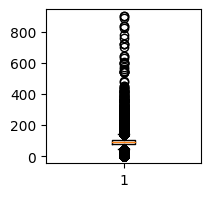

In [14]:
plt.figure(figsize=(2, 2))
plt.boxplot(cmu_movies['Movie runtime'].dropna())
plt.show()

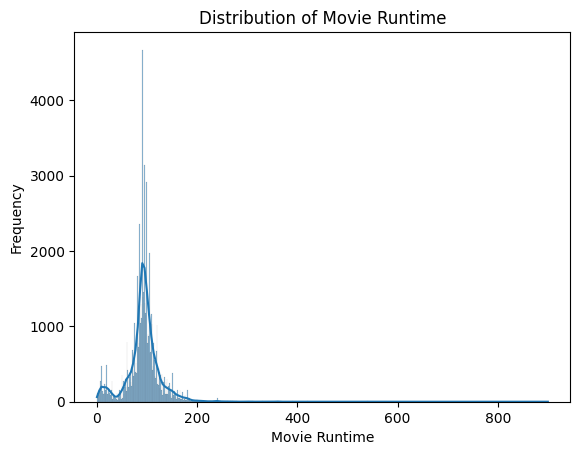

In [15]:
sns.histplot(cmu_movies['Movie runtime'].dropna(), kde=True)
plt.xlabel('Movie Runtime')
plt.ylabel('Frequency')
plt.title('Distribution of Movie Runtime')
plt.show()

In [16]:
len(cmu_movies[cmu_movies["Movie runtime"] > 240 ]) # over 4h (to clean or to ignore/remove)
# Also low values, could be runtimes expressed in hours and not minutes

222

### Revenue (Box office)

In [17]:
tot = cmu_movies["Movie box office revenue"].sort_values().unique()
for x in tot:
    print(x)

10000.0
10200.0
10474.0
10514.0
10670.0
11238.0
11290.0
11295.0
11384.0
11385.0
11408.0
11807.0
11859.0
11864.0
11931.0
12288.0
12626.0
12631.0
12636.0
12686.0
12728.0
12854.0
12858.0
12971.0
13093.0
13229.0
13276.0
13330.0
13493.0
13514.0
13737.0
13996.0
14692.0
15000.0
15035.0
15078.0
15198.0
15355.0
15425.0
15510.0
15516.0
15593.0
15970.0
16100.0
16329.0
16659.0
16799.0
16814.0
17285.0
17921.0
17986.0
18000.0
18012.0
18334.0
18369.0
18476.0
18719.0
19140.0
19317.0
19411.0
20035.0
20166.0
20250.0
20361.0
20473.0
20666.0
20693.0
20998.0
21427.0
21508.0
21521.0
21813.0
22189.0
22464.0
22623.0
22779.0
22900.0
22970.0
22978.0
23179.0
23671.0
23719.0
23844.0
24164.0
24625.0
24651.0
25000.0
25180.0
25695.0
25775.0
26274.0
26377.0
26558.0
27488.0
27500.0
27769.0
27816.0
27843.0
27935.0
28044.0
28100.0
28737.0
29245.0
29367.0
29802.0
29813.0
30005.0
30229.0
30379.0
30471.0
30497.0
30638.0
30680.0
30738.0
30858.0
31000.0
31211.0
31651.0
31815.0
32033.0
32118.0
32279.0
32458.0
32655.0
32925.0


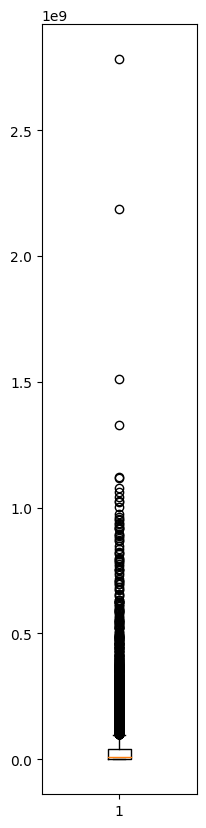

In [18]:
plt.figure(figsize=(2, 10))
plt.boxplot(cmu_movies['Movie box office revenue'].dropna())
plt.show()

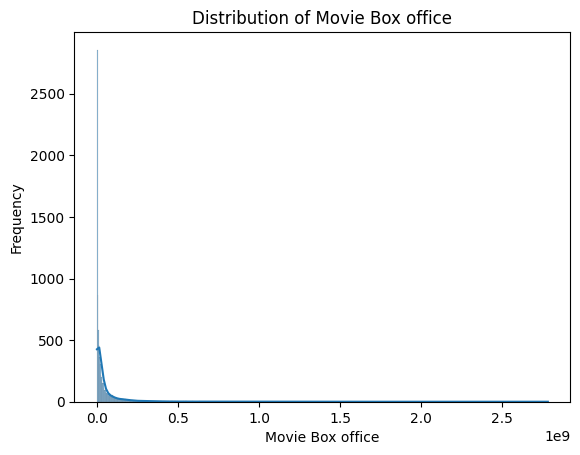

In [19]:
sns.histplot(cmu_movies['Movie box office revenue'].dropna(), kde=True)
plt.xlabel('Movie Box office')
plt.ylabel('Frequency')
plt.title('Distribution of Movie Box office')
plt.show()

Can't use directly, multiple currencies, also some values could be directly expressed in millions of \\$ and not \\$. Possibly accept the anglosaxon bias, and only take Box Office from US, to only have dollar.

# 2) CMU Movie Metadata + Scraped CMU Movie Infobox

In [20]:
cmu_scraped_movies = read_dataframe(name='cmu/movies_scraped', preprocess=True)
#cmu_scraped_movies['profit'] = cmu_scraped_movies['Box office'] - cmu_scraped_movies['Budget']  # need to extract currency for both
cmu_scraped_movies

✅ Dropped initial screenplay related columns
✅ Parsed runtime
✅ Parsed revenue (box office)
✅ Parsed budget
✅ Generated movie profit
✅ Extracted movie release year
✅ Dropped parsed columns


,Wikipedia movie ID,Country,Language,runtime_minutes,revenue_currency,revenue_value,budget_currency,budget_value,profit_value,profit_currency,release_year
0,975900,United States,English,98.0,USD,14000000.0,USD,28000000.0,-14000000.0,USD,<NA>
1,3196793,<NA>,<NA>,45.0,<NA>,NaN,<NA>,NaN,NaN,<NA>,<NA>
2,28463795,Norway,Norwegian,83.0,<NA>,NaN,<NA>,NaN,NaN,<NA>,<NA>
3,9363483,United Kingdom,English,111.0,<NA>,NaN,USD,2800000.0,NaN,<NA>,1987
4,261236,West Germany,German,106.0,<NA>,NaN,<NA>,NaN,NaN,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...
81736,35228177,<NA>,English,90.0,<NA>,NaN,<NA>,NaN,NaN,<NA>,<NA>
81737,34980460,Ireland,<NA>,96.0,<NA>,NaN,<NA>,NaN,NaN,<NA>,<NA>
81738,9971909,United States,English,66.0,<NA>,NaN,<NA>,NaN,NaN,<NA>,<NA>
81739,913762,<NA>,<NA>,NaN,<NA>,NaN,<NA>,NaN,NaN,<NA>,<NA>


In [21]:
len(cmu_movies), len(cmu_scraped_movies) # preprocess of cmu_movies removes some rows, otherwise equal, # len(cmu_scraped_movies.dropna(how='all'))

(81730, 81741)

In [22]:
# Pandas merge key wants int64 for integer columns :/
cmu_movies = cast_back_to_int64(cmu_movies, "Wikipedia movie ID")
cmu_movies_enhanced = pd.merge(cmu_movies, cmu_scraped_movies, left_on="Wikipedia movie ID", right_on="Wikipedia movie ID", how="left")
cmu_movies = downcast_int64(cmu_movies, "Wikipedia movie ID")
cmu_movies_enhanced = downcast_int64(cmu_movies_enhanced, "Wikipedia movie ID")

if cmu_scraped_movies.shape[1] > 11:
    columns_to_drop = [
        'Movie genres', 'Directed by', 'Screenplay by', 'Story by', 
        'Based on', 'Produced by', 'Starring', 'Cinematography', 
        'Edited by', 'Music by', 'Production company', 'Distributed by'
    ]


    cmu_movies_enhanced = cmu_movies_enhanced.drop(columns=columns_to_drop)

In [23]:
cmu_movies_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81730 entries, 0 to 81729
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Wikipedia movie ID        81730 non-null  int32  
 1   Freebase movie ID         81730 non-null  string 
 2   Movie name                81730 non-null  string 
 3   Movie box office revenue  8401 non-null   float64
 4   Movie runtime             61279 non-null  float32
 5   Movie release Year        74831 non-null  Int16  
 6   Movie release Month       42662 non-null  Int8   
 7   Movie release Day         39368 non-null  Int8   
 8   Movie languages           81730 non-null  string 
 9   Movie countries           81730 non-null  string 
 10  Movie genres              81730 non-null  string 
 11  Country                   61232 non-null  string 
 12  Language                  61334 non-null  string 
 13  runtime_minutes           63102 non-null  float32
 14  revenu

In [24]:
cmu_movies_enhanced

,Wikipedia movie ID,Freebase movie ID,Movie name,Movie box office revenue,Movie runtime,Movie release Year,Movie release Month,Movie release Day,Movie languages,Movie countries,...,Country,Language,runtime_minutes,revenue_currency,revenue_value,budget_currency,budget_value,profit_value,profit_currency,release_year
0,975900,/m/03vyhn,Ghosts of Mars,14010832.0,98.0,2001,8,24,English,United States of America,...,United States,English,98.0,USD,14000000.0,USD,28000000.0,-14000000.0,USD,<NA>
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,NaN,95.0,2000,2,16,English,United States of America,...,<NA>,<NA>,45.0,<NA>,NaN,<NA>,NaN,NaN,<NA>,<NA>
2,28463795,/m/0crgdbh,Brun bitter,NaN,83.0,1988,<NA>,<NA>,Norwegian,Norway,...,Norway,Norwegian,83.0,<NA>,NaN,<NA>,NaN,NaN,<NA>,<NA>
3,9363483,/m/0285_cd,White Of The Eye,NaN,110.0,1987,<NA>,<NA>,English,United Kingdom,...,United Kingdom,English,111.0,<NA>,NaN,USD,2800000.0,NaN,<NA>,1987
4,261236,/m/01mrr1,A Woman in Flames,NaN,106.0,1983,<NA>,<NA>,German,Germany,...,West Germany,German,106.0,<NA>,NaN,<NA>,NaN,NaN,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81725,35228177,/m/0j7hxnt,Mermaids: The Body Found,NaN,120.0,2011,3,19,English,United States of America,...,<NA>,English,90.0,<NA>,NaN,<NA>,NaN,NaN,<NA>,<NA>
81726,34980460,/m/0g4pl34,Knuckle,NaN,96.0,2011,1,21,English,"Ireland,United Kingdom",...,Ireland,<NA>,96.0,<NA>,NaN,<NA>,NaN,NaN,<NA>,<NA>
81727,9971909,/m/02pygw1,Another Nice Mess,NaN,66.0,1972,9,22,English,United States of America,...,United States,English,66.0,<NA>,NaN,<NA>,NaN,NaN,<NA>,<NA>
81728,913762,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,NaN,150.0,1992,5,21,Japanese,Japan,...,<NA>,<NA>,NaN,<NA>,NaN,<NA>,NaN,NaN,<NA>,<NA>


In [25]:
# dates that are in the scraped dataframe but not in the original dataframe
cmu_movies_enhanced[
    cmu_movies_enhanced['Movie release Year'].isna() & 
    cmu_movies_enhanced['release_year'].notna()
][["Movie release Year", "release_year"]]

,Movie release Year,release_year
129,<NA>,1980
249,<NA>,1974
379,<NA>,1959
570,<NA>,2012
731,<NA>,2013
...,...,...
81146,<NA>,1984
81261,<NA>,1947
81480,<NA>,1969
81700,<NA>,1996


In [26]:
cmu_movies_enhanced[
    cmu_movies_enhanced['Movie release Year'].notna() & 
    cmu_movies_enhanced['release_year'].isna()
][["Movie release Year", "release_year"]]

,Movie release Year,release_year
0,2001,<NA>
1,2000,<NA>
2,1988,<NA>
4,1983,<NA>
5,1913,<NA>
...,...,...
81725,2011,<NA>
81726,2011,<NA>
81727,1972,<NA>
81728,1992,<NA>


In [27]:
print(cmu_movies_enhanced['Movie release Year'].count())
cmu_movies_enhanced['Movie release Year'] = cmu_movies_enhanced['Movie release Year'].fillna(cmu_movies_enhanced['release_year'])
print(cmu_movies_enhanced['Movie release Year'].count())

# can drop release_year
cmu_movies_enhanced = cmu_movies_enhanced.drop(columns=['release_year'])

74831
75443


In [28]:
cmu_movies_enhanced[
    cmu_movies_enhanced['Movie runtime'].isna() & 
    cmu_movies_enhanced['runtime_minutes'].notna()
][["Movie runtime", "runtime_minutes"]]

,Movie runtime,runtime_minutes
14,NaN,100.0
15,NaN,9.0
20,NaN,80.0
32,NaN,98.0
62,NaN,10.0
...,...,...
81660,NaN,80.0
81671,NaN,10.0
81694,NaN,103.0
81713,NaN,123.0


In [29]:
cmu_movies_enhanced[
    cmu_movies_enhanced['runtime_minutes'].isna() & 
    cmu_movies_enhanced['Movie runtime'].notna()
][["Movie runtime", "runtime_minutes"]]

,Movie runtime,runtime_minutes
5,35.0,NaN
6,86.0,NaN
23,97.0,NaN
35,180.0,NaN
45,96.0,NaN
...,...,...
81622,120.0,NaN
81632,145.0,NaN
81643,20.0,NaN
81703,90.0,NaN


In [30]:
# can drop Movie runtime column because we aren't sure of the time unit
cmu_movies_enhanced = cmu_movies_enhanced.drop(columns=['Movie runtime'])
# can drop Movie box office as the currency is missing
cmu_movies_enhanced = cmu_movies_enhanced.drop(columns=['Movie box office revenue'])